# Data exploration and word clouds

Women’s Clothing E-Commerce dataset is revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

Dataset can be downloaded from here: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Reading and investigating the data

In [5]:
data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=0) 
print("The shape of data=",data.shape)
data.head()

The shape of data= (23486, 10)


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [ ]:
#How many unique clothing ids there are
data['Clothing ID'].nunique()

1206

In [ ]:
#Check the categories in the categorial variable 1
data['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [ ]:
#Check the categories in the categorial variable 2
data['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [ ]:
#Check the categories in the categorial variable 3
data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [ ]:
#Check amount of nulls and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
#function to dived age into age groups
def age_group(data_frame):
    '''Function to define the age groups for a dataframe'''
    data_frame.loc[data_frame['Age']<25,'Age Group']   = '18-25'
    data_frame.loc[(data_frame['Age']>=25) & (data_frame['Age']<30),'Age Group']   = '25-30'
    data_frame.loc[(data_frame['Age']>=30) & (data_frame['Age']<35),'Age Group']   = '30-35'
    data_frame.loc[(data_frame['Age']>=35) & (data_frame['Age']<40),'Age Group']   = '35-40'
    data_frame.loc[(data_frame['Age']>=40) & (data_frame['Age']<50),'Age Group']   = '40-50'
    data_frame.loc[(data_frame['Age']>=50) & (data_frame['Age']<60),'Age Group']   = '50-60'
    data_frame.loc[(data_frame['Age']>=60) & (data_frame['Age']<70),'Age Group']   = '60-70'
    data_frame.loc[(data_frame['Age']>=70) & (data_frame['Age']<80),'Age Group']   = '70-80'
    data_frame.loc[(data_frame['Age']>=80) & (data_frame['Age']<90),'Age Group']   = '80-90'
    data_frame.loc[(data_frame['Age']>=90),'Age Group']   = '90-100'
    return data_frame

In this dataset one has 2 continuous numerical variables Age and Positive Feedback Count. Rating is ordinal and recommended IND is binary.


In [ ]:
data_num= data[['Age','Rating','Recommended IND', 'Positive Feedback Count']]
data_num.head()

,Age,Rating,Recommended IND,Positive Feedback Count
0,33,4,1,0
1,34,5,1,4
2,60,3,0,0
3,50,5,1,0
4,47,5,1,6


In [ ]:
data_num.describe()

,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000
mean,43.198544,4.196032,0.822362,2.535936
std,12.279544,1.110031,0.382216,5.702202
min,18.000000,1.000000,0.000000,0.000000
25%,34.000000,4.000000,1.000000,0.000000
50%,41.000000,5.000000,1.000000,1.000000
75%,52.000000,5.000000,1.000000,3.000000
max,99.000000,5.000000,1.000000,122.000000


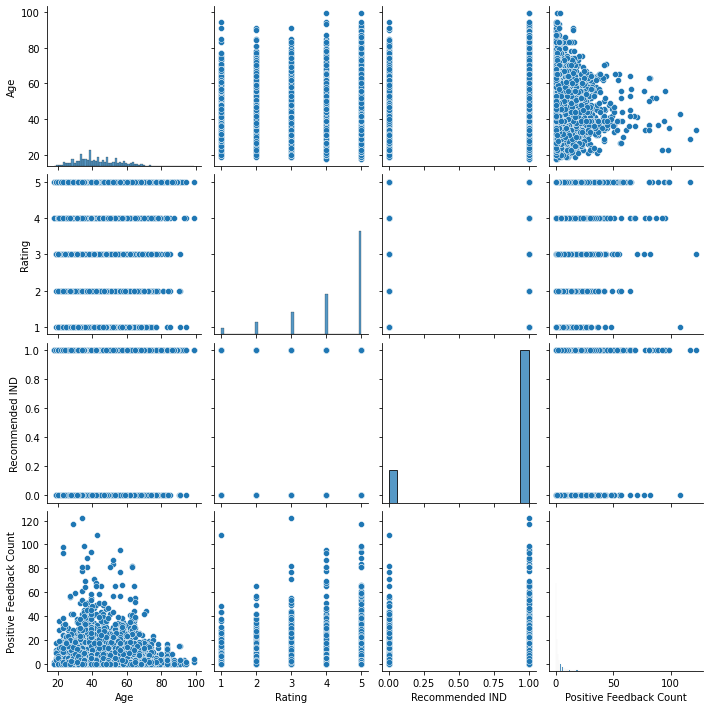

In [ ]:
import seaborn as sns
sns.pairplot(data_num)

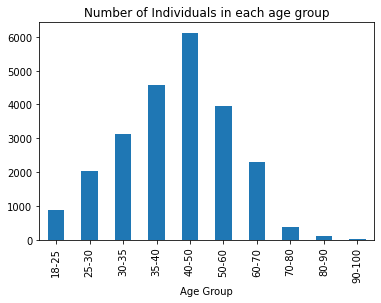

In [ ]:
# In what age group do the voters belong to?
data=age_group(data)
data_age_rating = data[['Age','Rating']].groupby(['Age','Rating']).size().reset_index()
data_age_rating.columns 
data_age_rating = age_group(data_age_rating)

data_age_rating.columns = ['Age','Rating','Freq','Age Group'] 

data_age_group_freq= data_age_rating.groupby('Age Group').agg({'Freq':np.sum}).reset_index()
data_age_group_freq.columns = ['Age Group','Freq']
data_age_group_freq.plot(kind='bar',x='Age Group',y='Freq',title='Number of Individuals in each age group')
plt.legend().remove()
 
plt.show()

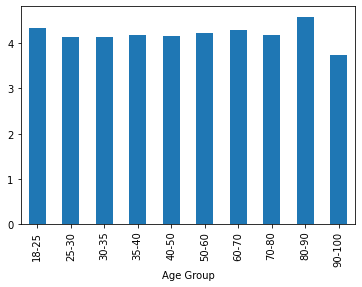

In [ ]:
# How did each age group vote on average?
data_age_rating['Total Rating'] = data_age_rating['Rating']*data_age_rating['Freq']
data_age_group_rating=data_age_rating.groupby('Age Group').agg({'Total Rating':np.sum,'Freq':np.sum}).reset_index()
data_age_group_rating['avg']= data_age_group_rating['Total Rating']/data_age_group_rating['Freq']
data_age_group_rating.plot(kind='bar',x='Age Group',y='avg')
plt.legend().remove()
plt.show()

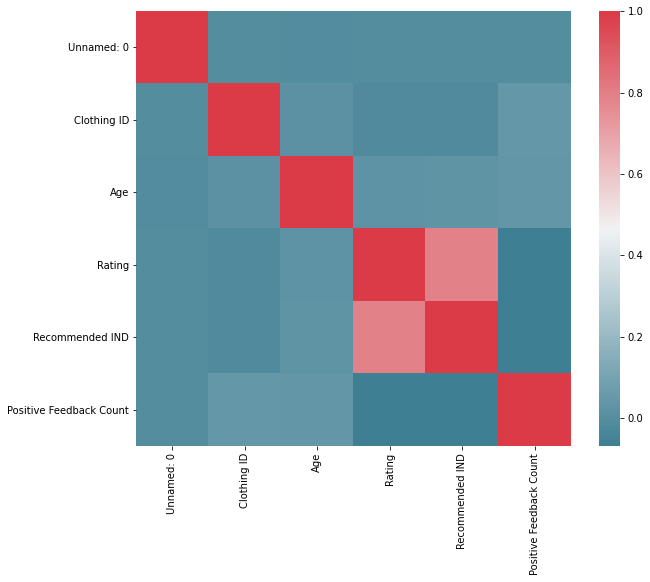

In [ ]:
#Rating seems to correlate with whether the item is recommended which makes sense.
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Investigating reviews with wordcloud

Following this example:
https://www.datacamp.com/community/tutorials/wordcloud-python

In [ ]:
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
#?WordCloud #Uncomment to get information about wordcloud

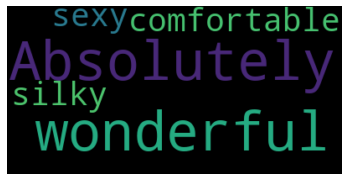

In [ ]:
# Start with one review:
text = data['Review Text'][0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

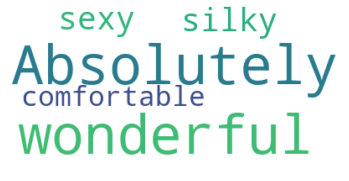

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_words=100, background_color="white", height=200, width=400).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

In [ ]:
text = " ".join(review for review in data['Review Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

There are 7015023 words in the combination of all review.


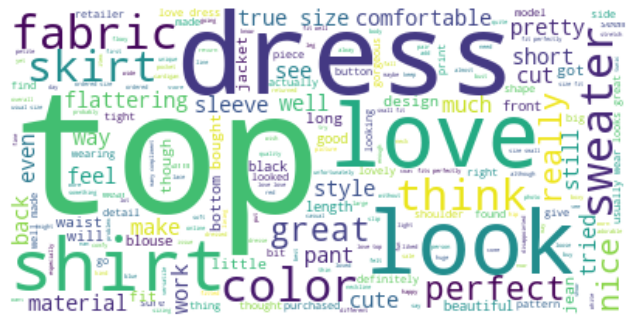

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["and", "one"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud of reviews where the customer gave a recommendation for the product

In [ ]:
#positive
data_positive = data[data['Recommended IND']==1]
text = " ".join(review for review in data_positive['Review Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5705150 words in the combination of all review.


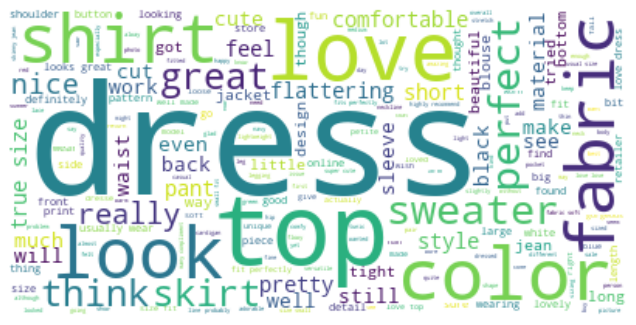

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["and", "one", "bought", "purchased", "ordered"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud of reviews where the customer did not give a recommendation for the product

In [ ]:
#negative
data_negative = data[data['Recommended IND']==0]
text = " ".join(review for review in data_negative['Review Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1309872 words in the combination of all review.


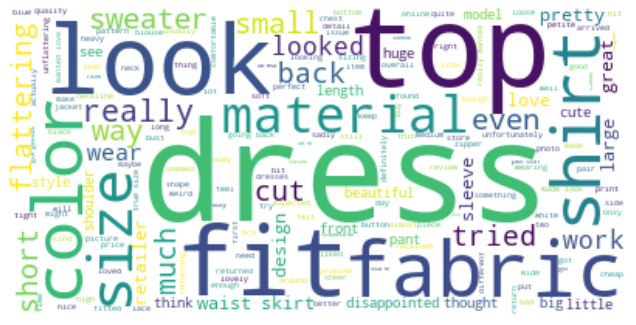

In [ ]:
plt.figure(figsize=(10, 10), dpi=80)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["and", "one", "bought", "purchased", "ordered"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Same words seem to rise in both the reviews where the item was not recommended and in those where the item was recommended like dress, shirt, fabric, color etc. Let's investigate further by looking into Recommended IND by Clothing ID.

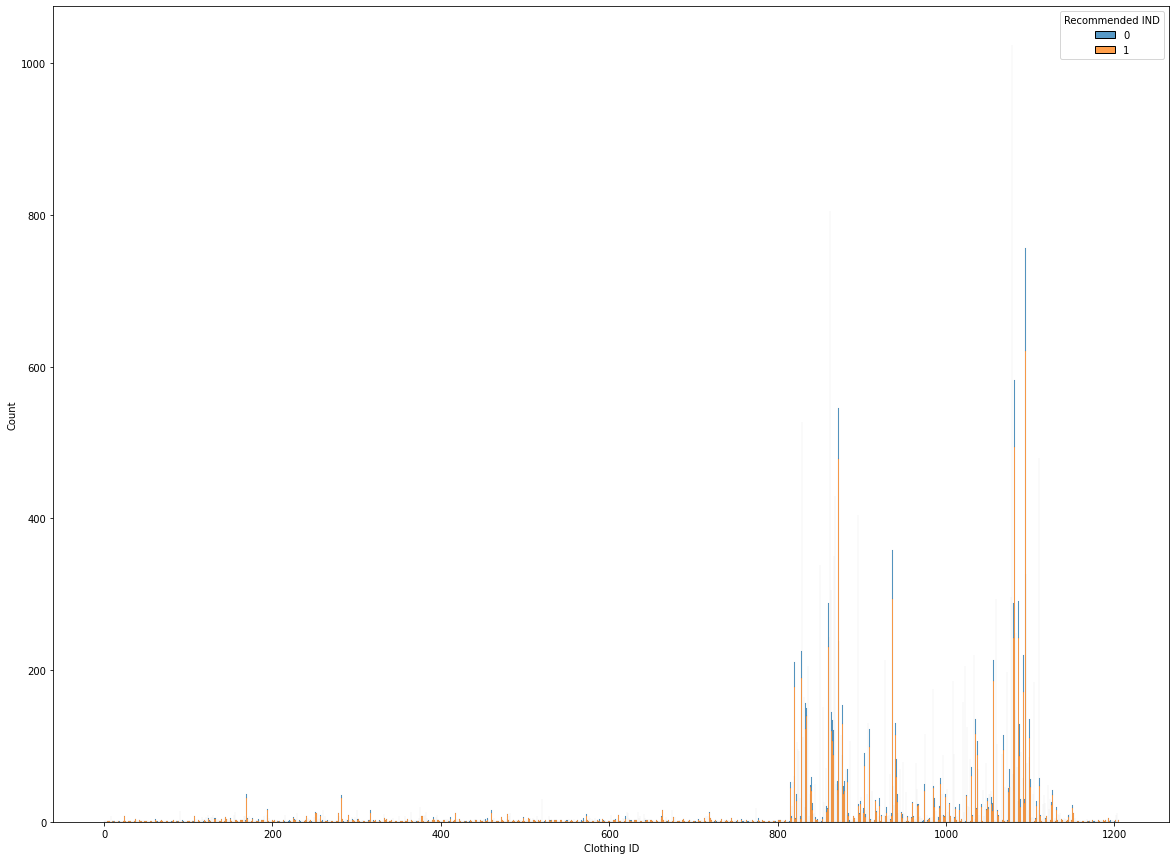

In [11]:
#How many recommendations and non-recommendations there are per clothing ID
%matplotlib inline
plt.figure(figsize=(20,15))
sns.histplot(binwidth=0.5, x="Clothing ID", hue="Recommended IND", data=data, stat="count", multiple="stack")

In [9]:
#Running this will take a long time!
smallset = data[data['Clothing ID']>800] #The most recommendations fall in this area
sns.factorplot("Recommended IND", col = "Clothing ID", col_wrap = 3,data = smallset,kind = "count")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


It seems that there are usually more recommendations than non-recommendations but most of the time some people have found the same product good and some don't want to recommend. It is important to understand why and what separates these shoppers! This could guide new shoppers in finding a suitable product if they can understand what has been a good choice for similar people. It would also help in sustainability as ordering and returning products creates a load on our environment. Unfortunately, we don't have shopper specific information in this dataset but we can use the review texts to try and understand the WHY better! 

Note: Some products get way more reviews in total. It would be interesting to undrestand why!

